In [2]:
# data science imports
import pandas as pd
from scipy.stats import chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load data set into Pandas dataframe
df = pd.read_csv('C:\\Users\\josue\\Desktop\\WGU\\D207\\churn_cleanedtest.csv')

print(df)
#describe the dataset
df.describe()

      Unnamed: 0  CaseOrder Customer_id                           Interaction  \
0              0          1     K409198  aa90260b-4141-4a24-8e36-b04ce1f4f77b   
1              1          2     S120509  fb76459f-c047-4a9d-8af9-e0f7d4ac2524   
2              2          3     K191035  344d114c-3736-4be5-98f7-c72c281e2d35   
3              3          4      D90850  abfa2b40-2d43-4994-b15a-989b8c79e311   
4              4          5     K662701  68a861fd-0d20-4e51-a587-8a90407ee574   
...          ...        ...         ...                                   ...   
9995        9995       9996     M324793  45deb5a2-ae04-4518-bf0b-c82db8dbe4a4   
9996        9996       9997     D861732  6e96b921-0c09-4993-bbda-a1ac6411061a   
9997        9997       9998     I243405  e8307ddf-9a01-4fff-bc59-4742e03fd24f   
9998        9998       9999     I641617  3775ccfc-0052-4107-81ae-9657f81ecdf3   
9999        9999      10000      T38070  9de5fb6e-bd33-4995-aec8-f01d0172a499   

              City State   

,Unnamed: 0,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,Outage_sec_perweek,...,MonthlyCharge,Bandwidth_GB_Year,Responses,Solutions,Replacements,Reliability,Options,Respectfulness,Courteous,Listening
count,10000.00000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4999.50000,5000.50000,49153.319600,38.757567,-90.782536,9756.562400,1.822500,53.207500,38256.017897,11.452955,...,174.076305,3397.166397,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600
std,2886.89568,2886.89568,27532.196108,5.437389,15.156142,14432.698671,1.925971,18.003457,24747.872761,7.025921,...,43.335473,2072.718575,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633
min,0.00000,1.00000,601.000000,17.966120,-171.688150,0.000000,0.000000,18.000000,740.660000,-1.348571,...,77.505230,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2499.75000,2500.75000,26292.500000,35.341828,-97.082812,738.000000,1.000000,41.000000,23660.790000,8.054362,...,141.071078,1312.130487,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,4999.50000,5000.50000,48869.500000,39.395800,-87.918800,2910.500000,1.000000,53.000000,33186.785000,10.202896,...,169.915400,3382.424000,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,7499.25000,7500.25000,71866.500000,42.106908,-80.088745,13168.000000,3.000000,65.000000,45504.192500,12.487644,...,203.777441,5466.284500,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,9999.00000,10000.00000,99929.000000,70.640660,-65.667850,111850.000000,10.000000,89.000000,258900.700000,47.049280,...,315.878600,7158.982000,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000


In [4]:
#remove unwanted columns
unwanted_columns = ["unnamed", "Interaction", "Lat", "Lng"]

for uc in unwanted_columns:
    if uc in df.columns:
        df.drop(columns=uc, inplace=True)
print (df)       

      Unnamed: 0  CaseOrder Customer_id          City State  \
0              0          1     K409198   Point Baker    AK   
1              1          2     S120509   West Branch    MI   
2              2          3     K191035       Yamhill    OR   
3              3          4      D90850       Del Mar    CA   
4              4          5     K662701     Needville    TX   
...          ...        ...         ...           ...   ...   
9995        9995       9996     M324793   Mount Holly    VT   
9996        9996       9997     D861732   Clarksville    TN   
9997        9997       9998     I243405      Mobeetie    TX   
9998        9998       9999     I641617    Carrollton    GA   
9999        9999      10000      T38070  Clarkesville    GA   

                     County    Zip  Population      Area             Timezone  \
0     Prince of Wales-Hyder  99927          38     Urban        America/Sitka   
1                    Ogemaw  48661       10446     Urban      America/Detroit   


In [11]:
# Create a contingency table
contingency_table = pd.crosstab(df['Churn'], df['Contract'])
contingency_table 

Contract,Month-to-month,One year,Two Year
Churn,,,
No,3422,1795,2133
Yes,2034,307,309


In [12]:
#get the % of out test variables
contingency_pct = pd.crosstab(df['Churn'], df['Contract'], normalize='index')
contingency_pct

Contract,Month-to-month,One year,Two Year
Churn,,,
No,0.465578,0.244218,0.290204
Yes,0.767547,0.115849,0.116604


In [32]:
# Perform Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print Chi-Square Test results
print(f"Chi-Square statistic: {chi2:.5f}")
print(f"p-value: {p:.157f}")
print(f"Degrees of freedom: {dof}")
print("Expected frequencies:")
print(expected)

Chi-Square statistic: 718.59158
p-value: 0.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000009
Degrees of freedom: 2
Expected frequencies:
[[4010.16 1544.97 1794.87]
 [1445.84  557.03  647.13]]


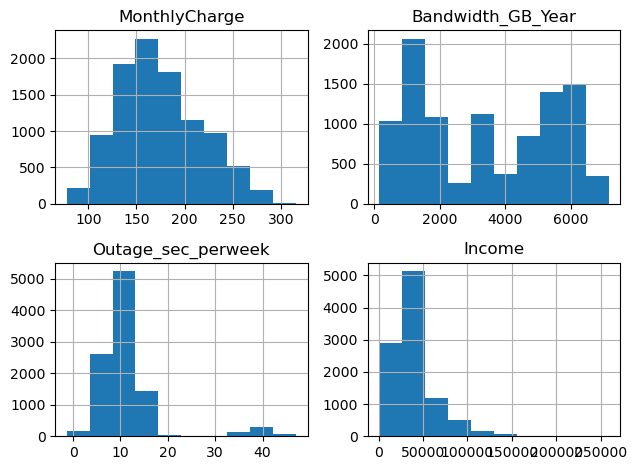

In [21]:
import seaborn as sns
# Continuous variables: MonthlyCharge, BandwidthGBYear,OutageSecPerweekIncome
df[['MonthlyCharge', 'Bandwidth_GB_Year', 'Outage_sec_perweek', 'Income']].hist()
plt.savefig('churn_pyplot.jpg')
plt.tight_layout()

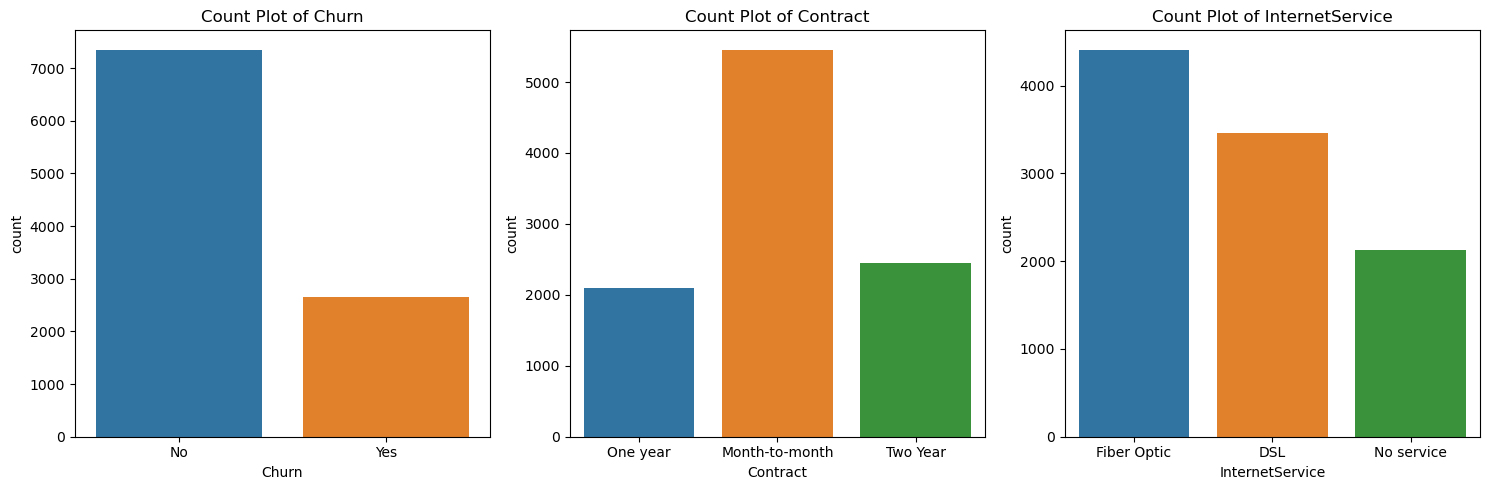

In [22]:
# List of categorical variables
categorical_vars = ['Churn', 'Contract', 'InternetService']

# Create count plots for each categorical variable
plt.figure(figsize=(15, 5))

for i, var in enumerate(categorical_vars, 1):
    plt.subplot(1, len(categorical_vars), i)
    sns.countplot(x=var, data=df)
    plt.title(f'Count Plot of {var}')

plt.tight_layout()
plt.show()

In [23]:
# Describe the categorical variables
categorical_description = df[categorical_vars].describe()

# Print the description
print(categorical_description)

        Churn        Contract InternetService
count   10000           10000           10000
unique      2               3               3
top        No  Month-to-month     Fiber Optic
freq     7350            5456            4408


In [26]:
bivariate = df[['MonthlyCharge', 'Bandwidth_GB_Year', 'Income', 'Outage_sec_perweek']]
#describe the bivariate variables
bivariate_description = bivariate.describe()
print(bivariate_description)

       MonthlyCharge  Bandwidth_GB_Year         Income  Outage_sec_perweek
count   10000.000000       10000.000000   10000.000000        10000.000000
mean      174.076305        3397.166397   38256.017897           11.452955
std        43.335473        2072.718575   24747.872761            7.025921
min        77.505230         155.506715     740.660000           -1.348571
25%       141.071078        1312.130487   23660.790000            8.054362
50%       169.915400        3382.424000   33186.785000           10.202896
75%       203.777441        5466.284500   45504.192500           12.487644
max       315.878600        7158.982000  258900.700000           47.049280


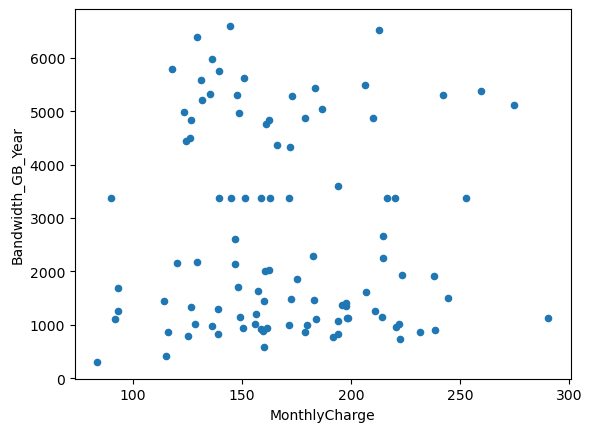

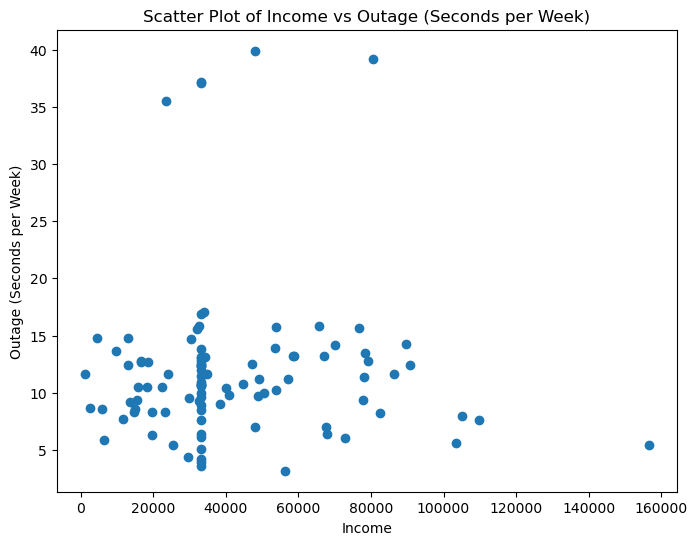

In [27]:
# Create dataframe for  bivariate  for our contiunous variables 
churn_bivariate = df[['MonthlyCharge', 'Bandwidth_GB_Year', 'Income', 'Outage_sec_perweek']]

# Create a scatter plot of continuous variables MonthlyCharge & Bandwidth_GB_Year
churn_bivariate[churn_bivariate['MonthlyCharge'] < 300].sample(100).plot.scatter(x='MonthlyCharge', 
                                                                                 y='Bandwidth_GB_Year')
# Create scatter plot of Income vs Outage_sec_perweek
plt.figure(figsize=(8, 6))
plt.scatter(x='Income', y='Outage_sec_perweek', data=churn_bivariate.sample(min(100, len(churn_bivariate))))
plt.xlabel('Income')
plt.ylabel('Outage (Seconds per Week)')
plt.title('Scatter Plot of Income vs Outage (Seconds per Week)')
plt.show()


<Figure size 1000x600 with 0 Axes>

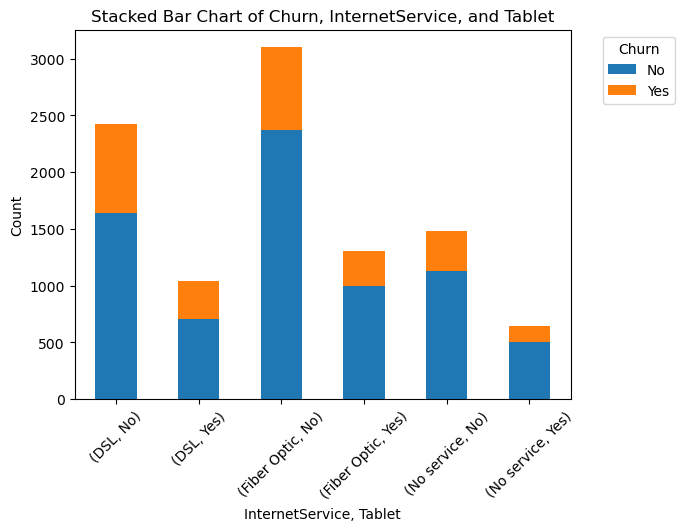

In [28]:
# Create a DataFrame containing the count of each combination of categories
stacked_data = df.groupby(['InternetService', 'Tablet', 'Churn']).size().unstack()

# Plot stacked bar chart
plt.figure(figsize=(10, 6))
stacked_data.plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Churn, InternetService, and Tablet')
plt.xlabel('InternetService, Tablet')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Churn', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

<Axes: xlabel='Income', ylabel='Outage_sec_perweek'>

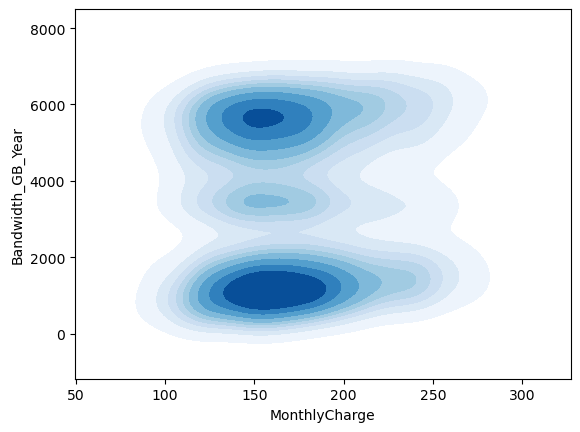

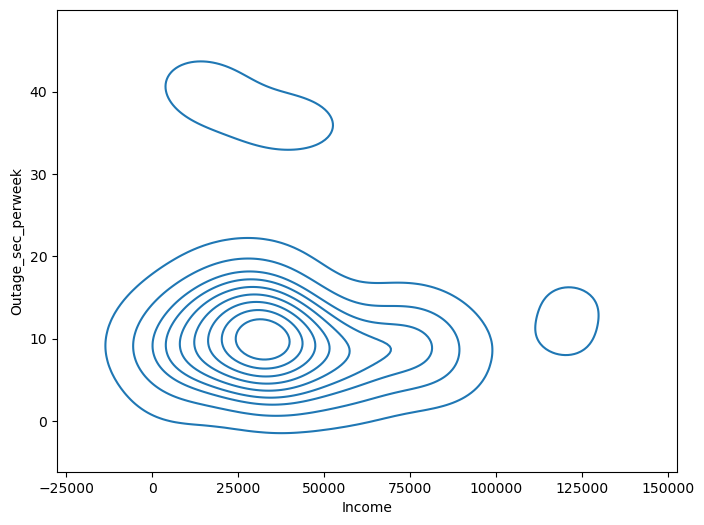

In [29]:
#create a visual represntation of so we can see how the data is distributed compared to a scatter plot
sns.kdeplot(data=bivariate[bivariate['MonthlyCharge'] < 300], x='MonthlyCharge', y='Bandwidth_GB_Year', cmap='Blues', fill=True)

plt.figure(figsize=(8, 6))
sns.kdeplot(x='Income', y='Outage_sec_perweek', data=churn_bivariate.sample(min(100, len(churn_bivariate))))